In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.preprocess as preprocess
import utils.metrics as met
import utils.graph as fig

In [2]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label', depth=2)
X_train, X_test, y_train, y_test = pre.preprocessing()

In [3]:
X_train = tf.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = tf.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [4]:
import utils.network.network12 as model

In [5]:
net = model.MyLstmModel()

In [6]:
algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.015, rho=0.9, momentum=0.9, epsilon=1e-07, decay= 1e-06, centered=False, name='RMSprop')
# algorithm = tf.keras.optimizers.SGD(learning_rate=0.035, momentum=0.95, nesterov=True, name='SGD')

net.compile(optimizer=algorithm, loss='binary_crossentropy', metrics=met.ModelMetric("binary_crossentropy").metric()) # categorical_crossentropy

In [7]:
from tensorflow.keras import callbacks
import datetime
from utils.learningrate_decay import step_decay, exp_decay
dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network12-RMSprop")
logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
lrate = callbacks.LearningRateScheduler(exp_decay)
csv_log = tf.keras.callbacks.CSVLogger('../trainLog/'+dir_name, separator=',', append=False)

In [8]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=40, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback, csv_log,  lrate], verbose=1) # lrate

ry_crossentropy: 0.1367 - val_loss: 0.1283 - val_tp: 140995.0000 - val_fp: 4473.0000 - val_tn: 140995.0000 - val_fn: 4473.0000 - val_acc: 0.0000e+00 - val_precision: 0.9693 - val_recall: 0.9693 - val_auc: 0.9950 - val_binary_accuracy: 0.9693 - val_binary_crossentropy: 0.1001 - lr: 0.0082
Epoch 5/40
663/663 [==============================] - 42s 64ms/step - loss: 0.1516 - tp: 321398.0000 - fp: 18026.0000 - tn: 321398.0000 - fn: 18026.0000 - acc: 0.0000e+00 - precision: 0.9469 - recall: 0.9469 - auc: 0.9896 - binary_accuracy: 0.9469 - binary_crossentropy: 0.1302 - val_loss: 0.1660 - val_tp: 136899.0000 - val_fp: 8569.0000 - val_tn: 136899.0000 - val_fn: 8569.0000 - val_acc: 0.0000e+00 - val_precision: 0.9411 - val_recall: 0.9411 - val_auc: 0.9868 - val_binary_accuracy: 0.9411 - val_binary_crossentropy: 0.1465 - lr: 0.0055
Epoch 6/40
663/663 [==============================] - 37s 56ms/step - loss: 0.1388 - tp: 321957.0000 - fp: 17467.0000 - tn: 321957.0000 - fn: 17467.0000 - acc: 0.0000e+

In [9]:
from utils.evl_metrics import getTrainMetricValue
results  = net.evaluate(X_test, y_test, verbose=1)
getTrainMetricValue(net, results)

6495/6495 [==============================] - 57s 9ms/step - loss: 0.0848 - tp: 201469.0000 - fp: 6342.0000 - tn: 201469.0000 - fn: 6342.0000 - acc: 0.0000e+00 - precision: 0.9695 - recall: 0.9695 - auc: 0.9961 - binary_accuracy: 0.9695 - binary_crossentropy: 0.0809
loss :  0.08476649224758148
tp :  201469.0
fp :  6342.0
tn :  201469.0
fn :  6342.0
acc :  0.0
precision :  0.969481885433197
recall :  0.969481885433197
auc :  0.9960823059082031
binary_accuracy :  0.969481885433197
binary_crossentropy :  0.08089711517095566


In [10]:
from utils.evl_metrics import confusion_matrix, eva_metric
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
confusion_matrix(y_label, y_class)
eva_metric(y_label, y_class)

TrueNegatives result:  127710.0
TruePositives result:  73759.0
FalseNegatives result:  2195.0
FalsePositives result:  4147.0
Recall result:  0.9711009
Precision result:  0.9467692


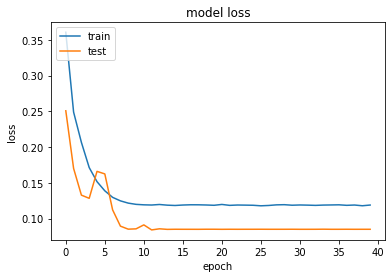

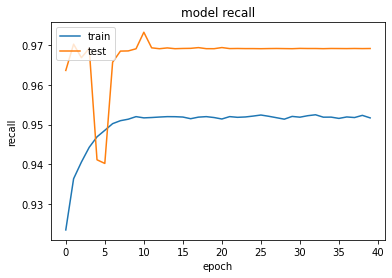

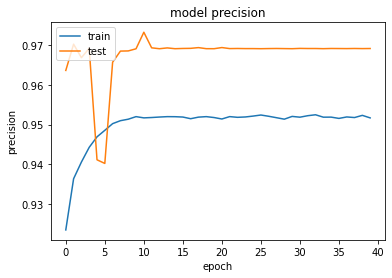

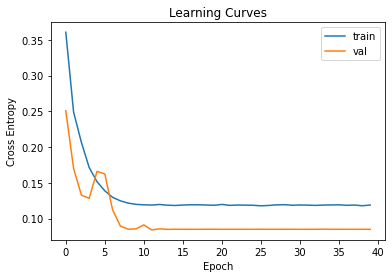

In [11]:
fig.add_dir(dir_name)
fig.loss_graph(model_,dir_name)
fig.recall_graph(model_,dir_name)
fig.precision_graph(model_,dir_name)
fig.cross_entropy_graph(model_,dir_name)
# fig.save_model(net,dir_name)

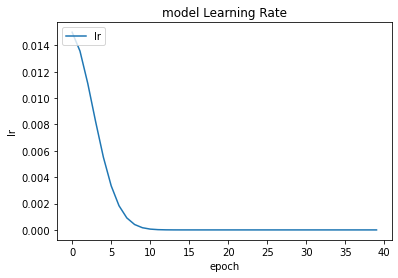

In [12]:
fig.lr_graph(model_, dir_name)